**Цель исследования** - выделить наиболее значимые факторы, определяющие фактический объем продаж КИ в разных регионах. 

**Задача** - используя накопленную статистику до 2016 года определить вероятный ход кампании продаж КИ в 2017 году. 

Для решения поставленных задач необходимо:
- Подготовить данные: преобразовать в нужные типы и отработать пропуски;
- Провести исследовательский анализ данных по продажам КИ на различных платформах;
- Определить портрет пользователя для каждого региона;
- Проверить гипотезы о равенстве рейнтингов КИ для разных платформ

### Открытие файла с данными и изучение общей информации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Открытие файла '/datasets/games.csv', сохранение датафрейма в переменную `data`.

In [2]:
data = pd.read_csv('/datasets/games.csv')

Вывод первых 15 строк датафрейма data

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Предобработка данных

Вывод основной информации для датфрейма data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Замена названий столбцов (приведение к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()

In [6]:
# поиск пропущенных значений в датафрейме
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Поиск дубликатов в датафрейме

In [7]:
data.duplicated().sum()

0

In [8]:
# Вывод на экран срез данных с пропущенными значениями в столбце ‘name’ применив метод isnull():
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Анализ пропущенных значения в столбце 'name' показывает, что объему данных о продажах неуказанного наименования игр ничтожно мал 
по сравнению с общим объемом данных о продажах КИ (0.011%). Также, по анализируемому срезу нет сведений об оценке критиков, пользователей,
рейтинге, жанре. Принято решение об удалении этих строк.

In [9]:
# Удалим строки в которых пропущено значение в столбце ‘name’ методом dropna():
data = data.dropna(subset=['name']).reset_index(drop=True)

In [10]:
# удалим пропуски в столбце 'year_of_release' для того, чтобы сконвертировать тип данных в int 
#(значения "Год" может принимать только целые значения)
data[data['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В итоге имеем 269 строк с неуказанным значением года выпуска игры (1,61% от объема данных). Можно удалить данные строки

In [11]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [12]:
# переведем тип данных в столбце 'year_of_release' в int:
data['year_of_release']= data['year_of_release'].astype('int')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
# анализ столбца 'user_score'. TBD (To Be Determined) - не указанная на данный момент оценка пользователей, она будет
# определена ими позже.
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
1.1       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [14]:
# Так как оценки пользователей не проставлены, то для целей дальнейшего анализа заменим их на NaN:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float ('nan')

In [15]:
data['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.9      2
1.1      2
9.6      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [16]:
# заменим тип данных у значений столбцов 'user_score'  на float. Столбец 'rating'  оставим с типом object, т.к. встречаются
# категориальные оценки игр (E,T и пр.)
data['user_score']= data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


По ряду игр заметно отсутствие оценок критиков и пользователей, например, по играм: Super Mario Bros для платформы NES или по игре Pokemon Red/Pokemon Blue	для платформы GB. Скорее всего эти игры не получили оценок в силу отсутствия к ним внимаения со стороны профессионального и любительского game-сообщества. Пропуски разумнее оставить, а не заполнять медианными значениями.

Подсчет суммарых продаж во всем регионам и указание информации в отдельном столбце

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())
print(data['total_sales'].sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


8814.369999999999


## Исследовательский анализ данных

Проведем анализ динамики выпуска игр по годам

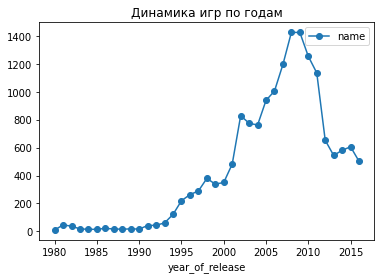

In [18]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='o-', title='Динамика игр по годам')
plt.show()

По данным из графика видим, что с 1993 года начинается активный рост числа выпускаемых игр на различных платформах. 
До этого периода динамика выпуска новых релизов в игровой индустрии была незначительной. Для целей дальнейшего анализа применим 
метод query для фильтрации года выпуска игр

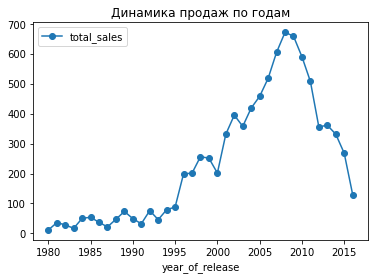

In [19]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='o-', title='Динамика продаж по годам')
plt.show()

По графику динамики валовых продаж также заметен рост объемов продаж КИ с 1993 года

In [20]:
data_for_analyze = data.query('year_of_release > 1993 and total_sales > 0')
data_for_analyze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16077 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16077 non-null  object 
 1   platform         16077 non-null  object 
 2   year_of_release  16077 non-null  int64  
 3   genre            16077 non-null  object 
 4   na_sales         16077 non-null  float64
 5   eu_sales         16077 non-null  float64
 6   jp_sales         16077 non-null  float64
 7   other_sales      16077 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9764 non-null   object 
 11  total_sales      16077 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


На данном этапе, по результатам фильтрации, мы оставили для целей дальнейшего анализа 16 077 записей (исключили 367 значений (игр выпущенных до 1193 года и не принесших выручки от продаж), что составило порядка 2,2 % от общих данных)

In [21]:
# анализ динамики продаж по платформам
data_for_analyze.sort_values(by = 'total_sales', ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
15922,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
15923,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
15924,The Legend of Heroes: Trails in the Sky Third ...,PS3,2013,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [22]:
#определим платформы с наибольшим объемам продаж
data_top_platform = data_for_analyze.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
top_platforms = data_top_platform.head(6)
print(data_top_platform)
print(top_platforms)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
Name: total_sales, dtype: float64


Наиболее прибыльными оказались плафтормы PS2, DS, PS3, Wii, X360, PS

PS2


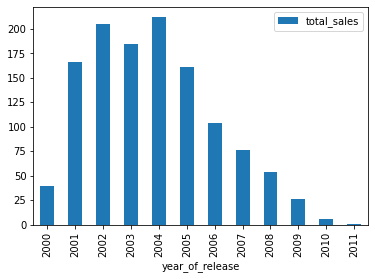

X360


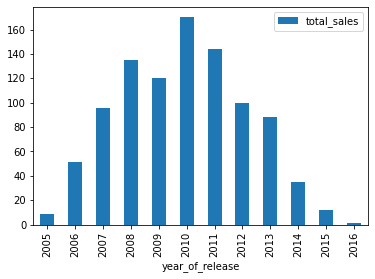

PS3


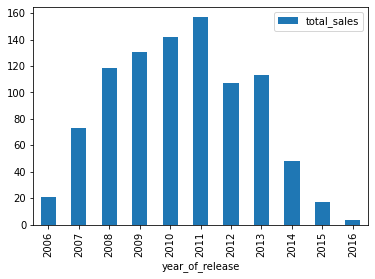

Wii


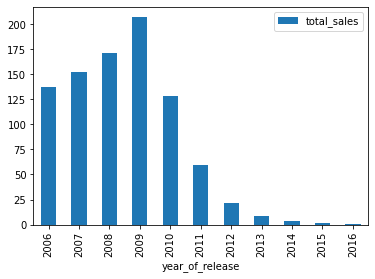

DS


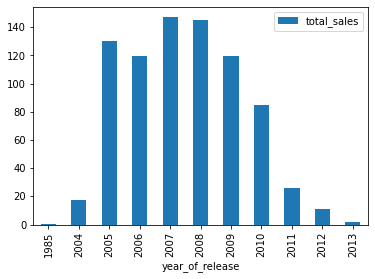

PS


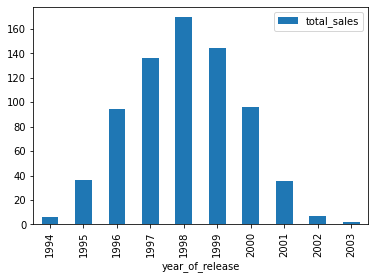

PS4


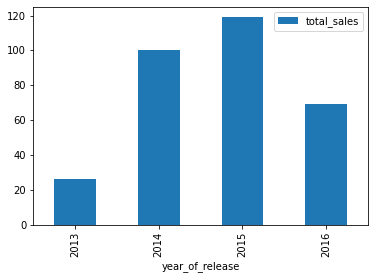

GBA


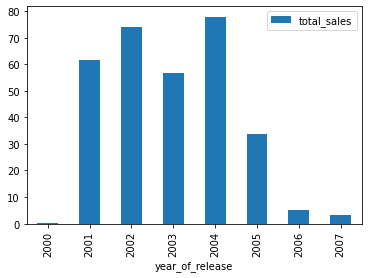

PSP


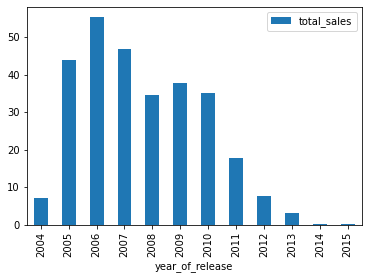

3DS


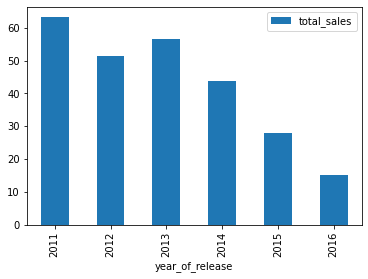

PC


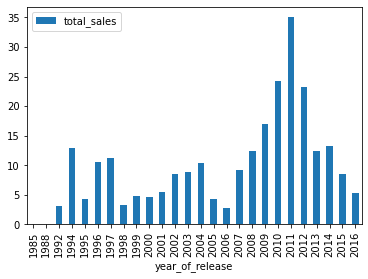

XB


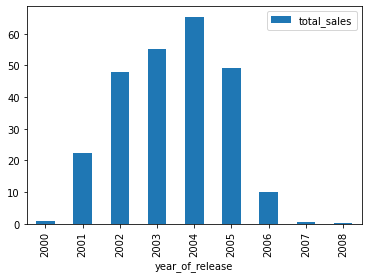

N64


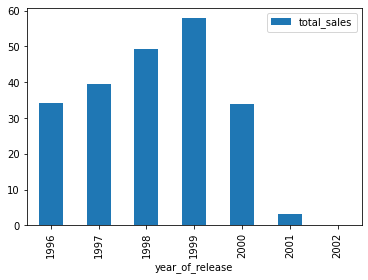

GC


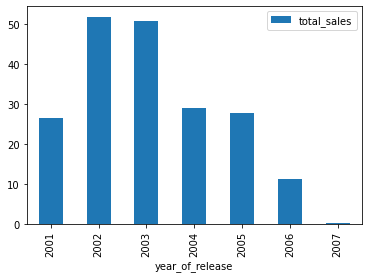

XOne


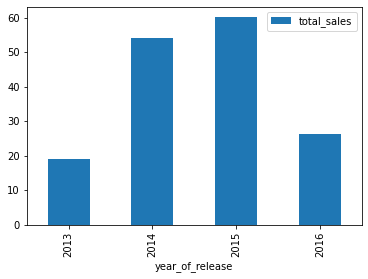

GB


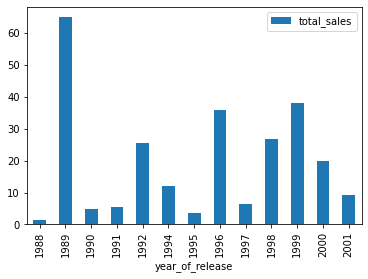

SNES


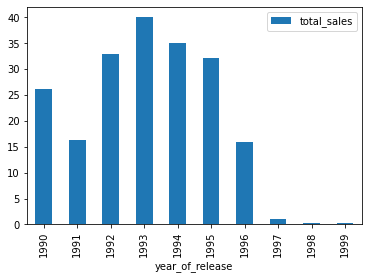

WiiU


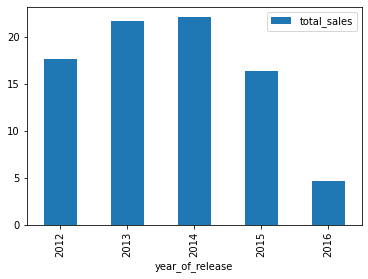

PSV


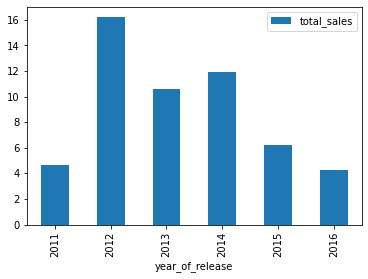

SAT


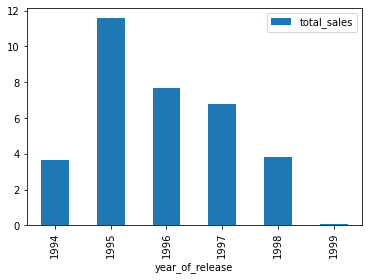

DC


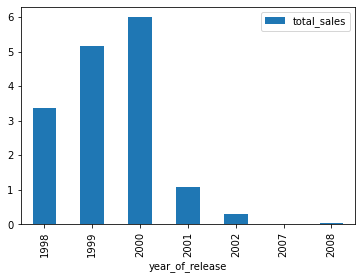

GEN


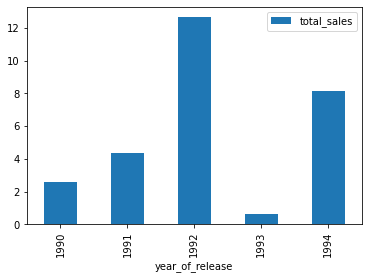

WS


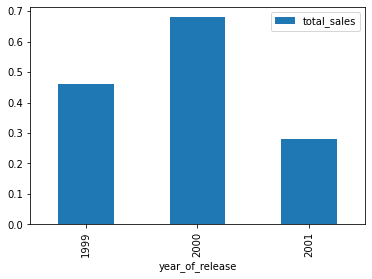

NG


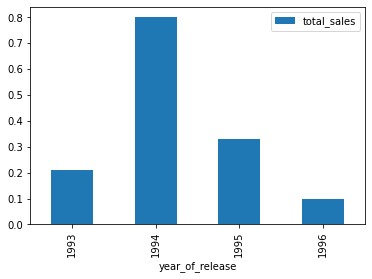

SCD


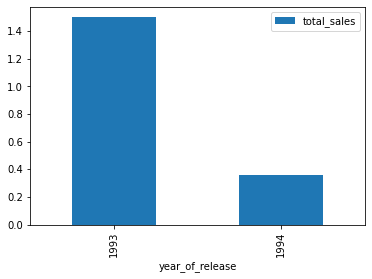

TG16


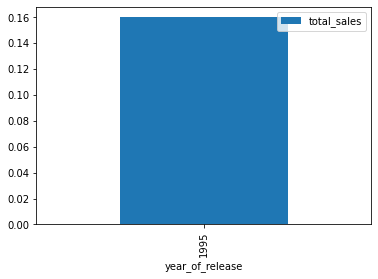

NES


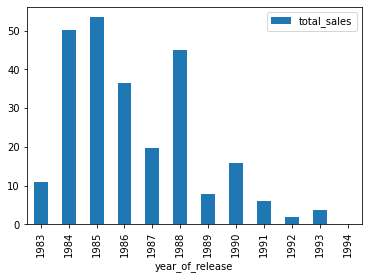

3DO


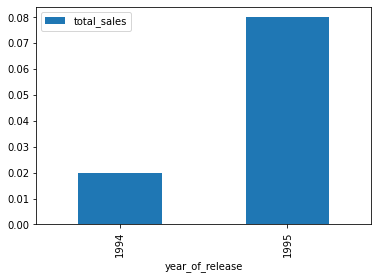

PCFX


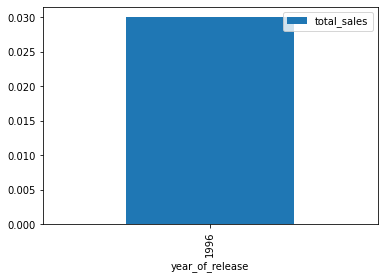

In [23]:
# проанализируем динамику продаж по платформам:
for platform in data_top_platform.index:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Для указанных выше топовых платформ: PS2, DS, PS3, Wii, X360, PS средний срок стабильных продаж и выхода новых игр - 10 лет. Это и есть период жизни платформы. Так, для:
- PS2: за период с момента выхода игр (2000 год) по 2004 год продажи выростали до 205 млн. прод. копий в год
- DS: за период с 1985 по 2007 год продажи вырастали до 150 млн. прод. копий в год
- PS3: за период с 2006 год по 2011 год продажи вырастали до 159 млн. копий в год
- WII: объем продаж выростал более чем за 200 млн. копий в 2009 году
- X360: в 2010 году объем продаж превысил 170 млн. копий
- PS: в 1998 году продажи превысили 170 млн. копий

<div class="alert alert-info">
Выше мы определили наиболее прибыльные платформы за весь анализируемый период. Однако в перечень таковых попали платформы, жизненный цикл которых закончен до окончания периода анализа (2016 года): PS2 (2011 год), DS (2013 год), PS (2003 год). 
Определим наиболее актуальные платформы, по которым можно построить прогноз на будущий год.

Наблюдается снижение продаж по таким платформам как 
(данные 2016 года неполные по условию задачи проекта, на этот год ориентируемся только для подтверждения динамики):
- PSV (в 2015 году снижение составило - 5,65 млн. проданных копий (-47%) по сравнении с аналогичным периодом прошлого года - АППГ)
- WiiU (в 2015 году снижение составило - 5,68 млн. проданных копий (-25,8%) по сравнению с АППГ)
- PC (в 2015 году снижение составило - 4,76 млн. проданных копий (-35,8%) по сравнению с АППГ)
- 3DS (в 2015 году снижение составило - 15,98 млн. проданных копий (-36,5%) по сравнению с АППГ)
- PSP (в 2015 году снижение составило - 0,12 млн. проданных копий (-59,0%) по сравнению с АППГ)
- Wii (в 2015 году снижение составило - 2,61 млн. проданных копий (-69,6%) по сравнению с АППГ)
- PS3 (в 2015 году снижение составило - 30,94 млн. проданных копий (-64,8%) по сравнению с АППГ)
- X360 (в 2015 году снижение составило - 22,78 млн. проданных копий (-65,6%) по сравнению с АППГ)

Наблюдается росто продаж на таких платформах как:
(данные 2016 года неполные по условию задачи проекта, на этот год ориентируемся только для подтверждения динамики):
- XOne (в 2015 году рост составил - 6,07 млн. проданных копий (+11,2%) по сравнению с АППГ)
- PS4 (в 2015 году рост составил - 18,9 млн. проданных копий (+18,9%) по сравнению с АППГ)


Таким образом заметен ярко выраженный тренд "угасания продаж" на платформах предыдущего поколения и рост продаж на PS4, Xone - на 2016 год выступающих платформами нового поколения.
Построим графики динамики объемов продаж по актуальным платформам, динамика продаж КИ на которых определяет тренды данного рынка:
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Отличный комментарий

</div>

In [24]:
top_plat_n = ['PSV', 'WiiU', '3DS', 'XOne', 'PS4', 'PC', 'PS3', 'Wii', 'X360', 'PSP']
data_temp_value = data_for_analyze.query('platform in @top_plat_n').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
data_temp_value 

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
1994,NaN,12.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,10.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,11.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,5.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим график по объединенной таблице

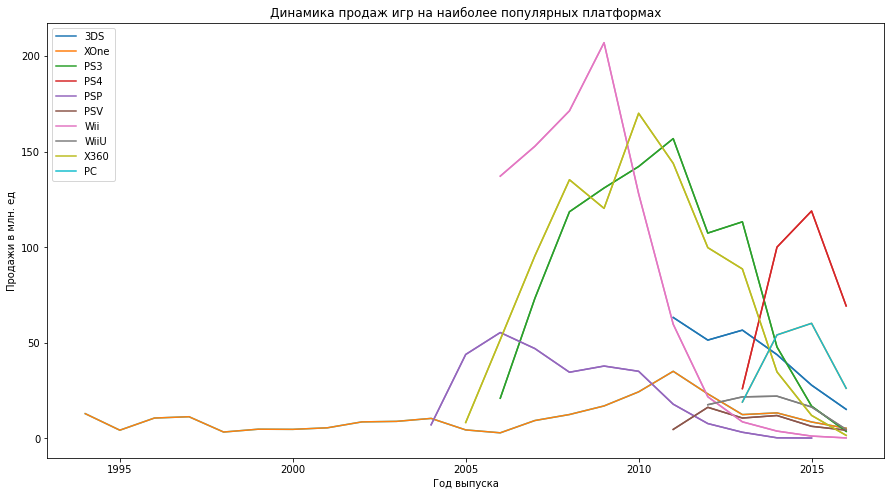

In [25]:
plt.figure(figsize = (15,8))
plt.plot(data_temp_value['3DS'], label = '3DS')
plt.plot(data_temp_value['XOne'], label = 'XOne')
plt.plot(data_temp_value['PS3'], label = 'PS3')
plt.plot(data_temp_value['PS4'], label = 'PS4')
plt.plot(data_temp_value['PSP'], label = 'PSP')
plt.plot(data_temp_value['PSV'], label = 'PSV')
plt.plot(data_temp_value['Wii'], label = 'Wii')
plt.plot(data_temp_value['WiiU'], label = 'WiiU')
plt.plot(data_temp_value['X360'], label = 'X360')
plt.plot(data_temp_value['PC'], label = 'PC')
plt.title('Динамика продаж игр на наиболее популярных платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи в млн. ед')
plt.plot(data_temp_value)
plt.legend(loc = 'upper left')

<div class="alert alert-info">
Из графика видно, что среди наиболее популярных платформ большая часть выручки получена после 2005 года. К 2015 году заметно снижение продаж по платформам: PSV, WiiU, PC, 3DS, PSP, Wii, PS3, X360. Из этого перечня имеются платформы нового поколения: PSV  и WiiU. Однако, в силу конкуренции со сторны платформ PS4 и XOne, объем продаж на них небольшой и также имеет понижательную тенденцию.

Наиболее перспективные плафтормы для продаж КИ в следующем году: PS4 и XOne (учитывая из положительной динамики их продаж). Также стоит присмотреться к платформам PSV  и WiiU, как к новым платформам, чей жизненный цикл не более 5 лет (Из 10 возможных как показывает статистика продаж по предыдущим платформам) и имеющим потенциал для роста.

У платформ Wii и PSP жизненный цикл подошел к окончанию. Их также в будущем анализе учитывать не будем.
    
В целях дальнейшего анализа будем использовать период 2013-2015 г.г. Это период появления новых платформ, отражения динамики спада продаж на платформах предыдущего поколения. 2016 год в силу неполноты данных в анализе в дальнейшем не используется.
</div>

In [26]:
# Отфильтруем значения предыдущего DF по устраивающему нас периоду времени
big_data_for_analyze= data_for_analyze.query('2013<=year_of_release <= 2015 and platform != ["PSP", "Wii"] ')
big_data_for_analyze.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Построим ящик с усами по актуальным платфрормам

In [27]:
#отберем нужные платформы в общем DF:
top_plat = ['PSV', 'WiiU', 'PC', 'PS3', 'X360', 'PS','3DS', 'PS4', 'XOne']  
data_temp_r = big_data_for_analyze.query('platform in @top_plat')
data_temp_r

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16396,Hanasaku Manimani,PSV,2014,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16397,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16403,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16421,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


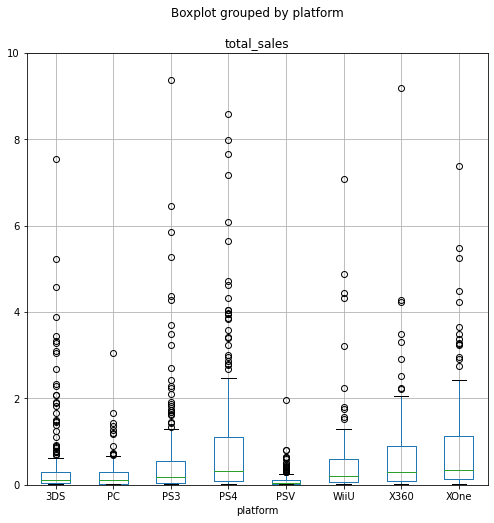

(0.0, 2.5)

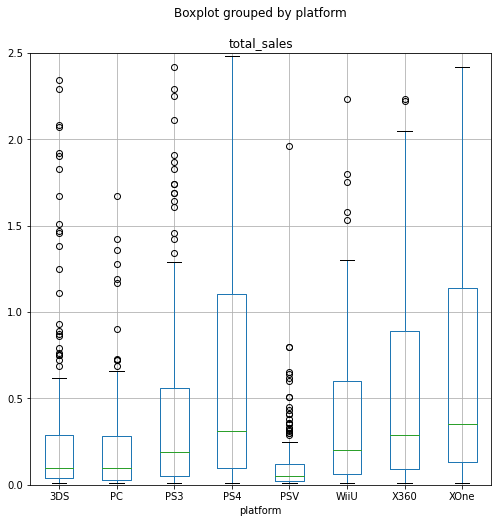

In [28]:
# строим ящик с усами:
data_temp_r.boxplot(figsize=(8,8), column=['total_sales'], by = 'platform')
plt.ylim(0,10)
plt.show()
data_temp_r.boxplot(figsize=(8,8), column=['total_sales'], by = 'platform')
plt.ylim(0,2.5)

Проведем интерпретацию графика. По межквартильному размаху видно, что самые большие продажи игр за аназизируемый период наблюдались на платформах PS4,  XOne, PS3, X360, WiiU. Большая часть проданных игр на платформах PS3 и Х360 была реализована в пределах 750 тыс.копий, общий объем продаж у этих платформ в целом одинаков, как и медиана, но у Х360 были экземпляры, проданные большим тиражом (что показывают нам выбросы). Выявленные выбросы удалять из анализа не вижу целесообразным в силу особенности этих игровых платформ и эксклюзивных игр, выпущенных для них же. Этим и объясняется ниличие отдельных выбросов для каждой из платформ. Наличие выбросов, само по себе, дает представление о популряности определенной платформы в целом для геймсообщества.

Проанализируем, какую роль оказывают отзывы критиков и пользователей на продажи на наиболее популярных платформах.

График для платформы: PS3
Коэффициент корреляции между critic_score и total_sales 0.334
Коэффициент корреляции между user_score и total_sales -0.016


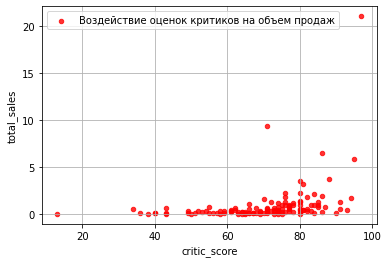

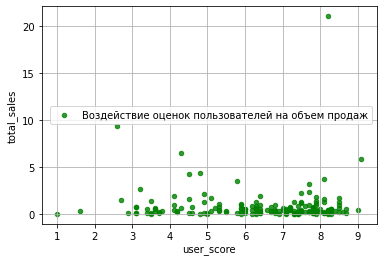

График для платформы: X360
Коэффициент корреляции между critic_score и total_sales 0.35
Коэффициент корреляции между user_score и total_sales -0.035


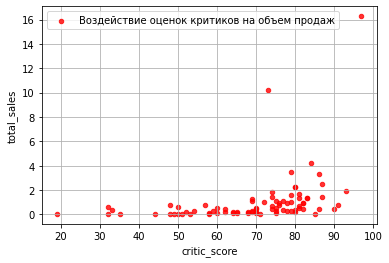

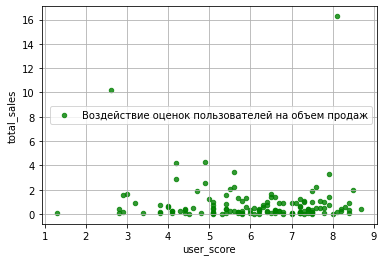

График для платформы: PS4
Коэффициент корреляции между critic_score и total_sales 0.432
Коэффициент корреляции между user_score и total_sales 0.024


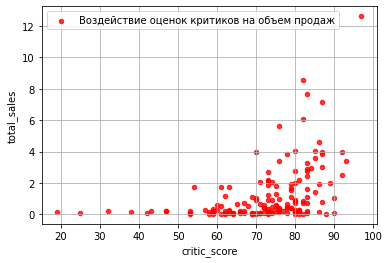

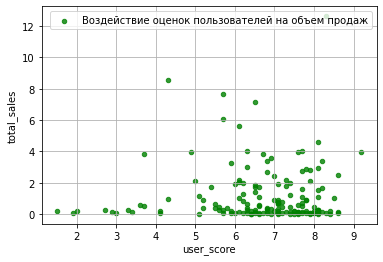

График для платформы: 3DS
Коэффициент корреляции между critic_score и total_sales 0.384
Коэффициент корреляции между user_score и total_sales 0.265


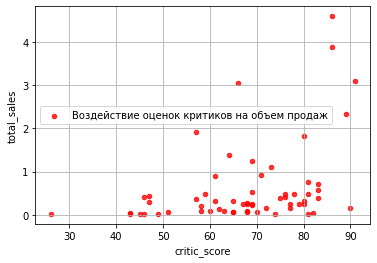

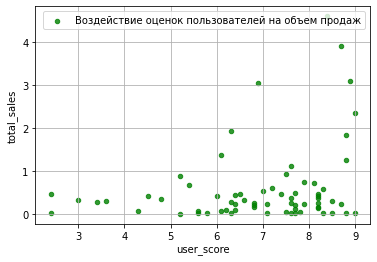

График для платформы: XOne
Коэффициент корреляции между critic_score и total_sales 0.459
Коэффициент корреляции между user_score и total_sales -0.039


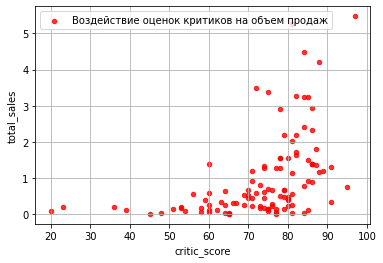

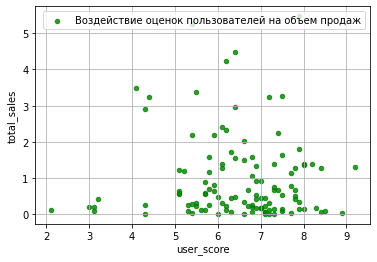

График для платформы: WiiU
Коэффициент корреляции между critic_score и total_sales 0.384
Коэффициент корреляции между user_score и total_sales 0.433


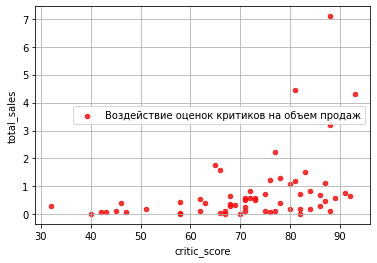

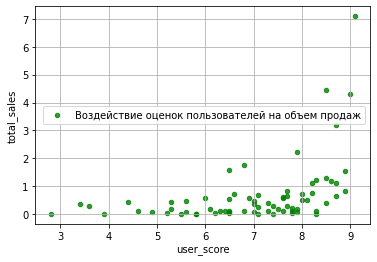

График для платформы: PC
Коэффициент корреляции между critic_score и total_sales 0.216
Коэффициент корреляции между user_score и total_sales -0.129


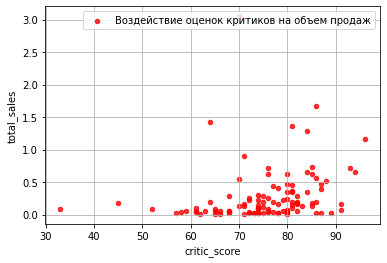

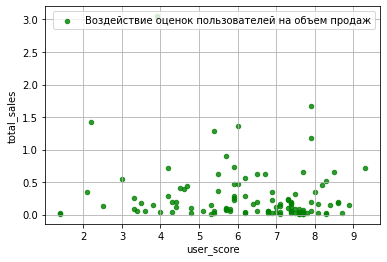

График для платформы: PSV
Коэффициент корреляции между critic_score и total_sales 0.303
Коэффициент корреляции между user_score и total_sales 0.018


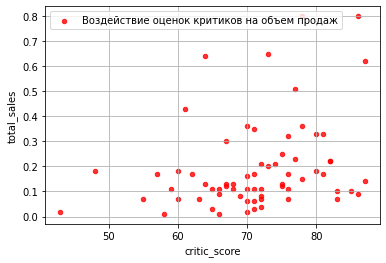

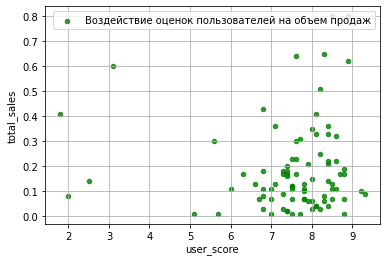

In [29]:
#создадим функцию, отражающую зависимость объемов продаж от оценок пользователей и критиков, а также для построения диаграмм рассеяния:
def gr_corr(data):
    try:
        platforms = data_temp_r['platform'].unique()
        for platform in platforms:
            print(f'График для платформы: {platform}')
            print('Коэффициент корреляции между critic_score и total_sales', \
              round(data_temp_r[data_temp_r['platform'] == platform]['critic_score'].corr(data_temp_r[data_temp_r['platform']==platform]['total_sales']),3))
            print('Коэффициент корреляции между user_score и total_sales', \
              round(data_temp_r[data_temp_r['platform'] == platform]['user_score'].corr(data_temp_r[data_temp_r['platform']==platform]['total_sales']),3))
            data_temp_r[data_temp_r['platform']==platform].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8,\
                        grid=True, legend = True, label = 'Воздействие оценок критиков на объем продаж', color = 'red')
            data_temp_r[data_temp_r['platform']==platform].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8,\
                        grid=True, legend = True, label = 'Воздействие оценок пользователей на объем продаж', color = 'green')
            plt.show()
    except:
        return print ('Ошибка в работе функции')

gr_corr(data_temp_r)

Влияние оценок пользователей (за исключением WiiU) нельзя назвать определяющим фактором в объемах продаж на наиболее популярных платформах. Однако на конкретных платформах определенная положительная связь между оценками критиков и валовым объемом продаж прослеживается. Так, например, Оценки критиков на игровой платформе Х360, при прочих равных условиях, могут практически на 35% обуславливать высокие продажи КИ при высоких оценках критиков. Такая же связь наблюдается и на платфорах PS4(43%), PS3 (33%), 3DS (38%), XOne (45,9%). Для платформы WiiU выявлена положительная зависимость оценок пользователей и продаж на платформе (r - 0.43)

Проведем анализ влияния оценок пользователей и критиков на продажи на остальных платформах:

In [30]:
#создадим DF без популярных платформ:
data_without_tp = data_for_analyze[~data_for_analyze['platform'].isin(['PSV', 'WiiU', 'PC', 'PS3', 'X360', 'PS','3DS', 'PS4', 'XOne'])]
data_without_tp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16430,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16435,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16437,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [31]:
#посмотри, какие платформы остались в Датафрейме:
data_without_tp['platform'].unique()

array(['Wii', 'GB', 'DS', 'PS2', 'GBA', 'N64', 'SNES', 'XB', 'PSP', 'GC',
       'DC', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16', 'NES', '3DO',
       'PCFX'], dtype=object)

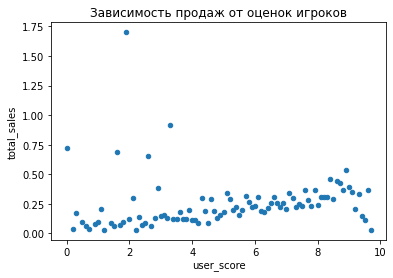

0.09454240340773211


In [32]:
#определение воздействия оценок пользователей на продажи:
data_without_tp.pivot_table(index='user_score', values='total_sales', aggfunc='median').reset_index().plot(title='Зависимость продаж от оценок игроков', x = 'user_score', y = 'total_sales', kind = 'scatter')
plt.show()
#r-коэффициент Пирсона:
print(data_without_tp['user_score'].corr(data['total_sales']))

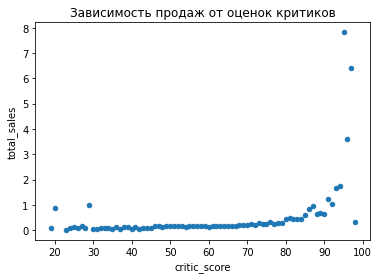

0.188206662281264


In [33]:
#определение воздействия оценок критиков на продажи:
data_without_tp.pivot_table(index='critic_score', values='total_sales', aggfunc='median').reset_index().plot(title='Зависимость продаж от оценок критиков', x = 'critic_score', y = 'total_sales', kind = 'scatter')
plt.show()
#r-коэффициент Пирсона:
print(data_without_tp['critic_score'].corr(data['total_sales']))

По полученным данным зависимости объема продаж от оценок игрового сообщества, можно сделать вывод о наличии достаточно слабой положительной зависимости продаж от оценок критиков (r-коэффициент 0.19). Оценки игроков на продажи на исследуемых на данном этапе платформах практически влияния не оказывают.

In [34]:
# проанализируем распределение игр по жанрам в разрезе объемов продаж по каждому из них:
data_top_genres = big_data_for_analyze.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
data_top_genres

genre
Action          288.08
Shooter         194.76
Role-Playing    126.68
Sports          125.52
Misc             53.17
Platform         37.15
Racing           37.10
Fighting         30.82
Simulation       19.73
Adventure        18.93
Strategy          8.67
Puzzle            3.16
Name: total_sales, dtype: float64

Из полученных данно хорошо заметны лидеры в продажа - КИ жанров Action и Sports. Посмотрим динамику их продаж за период 2013 - 2015 г.г.

[Text(0.5, 0, 'year_of_release'), Text(0, 0.5, 'объем продаж')]

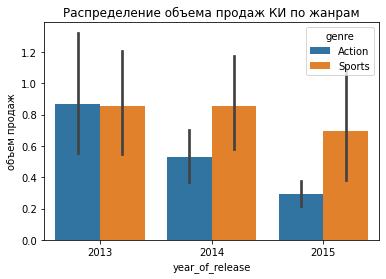

In [35]:
top_genre = ['Action', 'Sports']
data_temp_genre = big_data_for_analyze.query('genre in @top_genre')
ax = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="genre",
            data=data_temp_genre,
            )

ax.set_title('Распределение объема продаж КИ по жанрам')
ax.set(xlabel='year_of_release', ylabel='объем продаж')

C 2014 года заметно преобладание в объемах продаж жанра Sport. В 2013 году незначительно преобладали в продажах КИ жанра Action.

Определим количество игр в анлизириуемых нами жанрах, проданных за 2013-2015 г.г.

In [36]:
rt=big_data_for_analyze.query('genre in @top_genre' ).groupby('genre')['name'].count().sort_values(ascending = False)
rt

genre
Action    568
Sports    158
Name: name, dtype: int64

In [37]:
rt_genreAction = big_data_for_analyze.query('genre in @top_genre' ).groupby(['genre', 'year_of_release']).agg({'total_sales':'sum'})
rt_genreAction

total_sales
genre  year_of_release             
Action 2013                  120.22
       2014                   96.15
       2015                   71.71
Sports 2013                   40.18
       2014                   44.50
       2015                   40.84

 Медианные значения показывают, что лучше продаются игры жанра Action

Составим портрет пользователя каждого региона.

In [38]:
# среди рейтингов есть пропуски. Игры без рейтина ESRB могут у нас быть исключены из анализа. Чтобы этого не произошло, поставим заглушку
big_data_for_analyze['rating'].unique()
big_data_for_analyze['rating'] = big_data_for_analyze['rating'].fillna('no rating')
big_data_for_analyze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 16 to 16436
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1642 non-null   object 
 1   platform         1642 non-null   object 
 2   year_of_release  1642 non-null   int64  
 3   genre            1642 non-null   object 
 4   na_sales         1642 non-null   float64
 5   eu_sales         1642 non-null   float64
 6   jp_sales         1642 non-null   float64
 7   other_sales      1642 non-null   float64
 8   critic_score     758 non-null    float64
 9   user_score       921 non-null    float64
 10  rating           1642 non-null   object 
 11  total_sales      1642 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 166.8+ KB


/tmp/ipykernel_97/2287045099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data_for_analyze['rating'] = big_data_for_analyze['rating'].fillna('no rating')


In [39]:
#посмотрим на наиболее популярные платформы для каждого из регионов и определим долю продаж, которую они занимают
data_reg = big_data_for_analyze.pivot_table(
           index='platform', \
           values=['na_sales', 'eu_sales', 'jp_sales'], \
          aggfunc='sum' \
).reset_index()
data_reg['total_value'] = data_reg['na_sales'] + data_reg['eu_sales'] + data_reg['jp_sales']
#посмотрим доли каждой платформы в продажах по регионам:
data_reg['share_of_region_sales_NA, %'] = round(data_reg['na_sales']/data_reg['total_value']*100,2)
data_reg['share_of_region_sales_EU, %'] = round(data_reg['eu_sales']/data_reg['total_value']*100,2)
data_reg['share_of_region_sales_JP, %'] = round(data_reg['jp_sales']/data_reg['total_value']*100,2)
#посмотрим долю каждой платформы в продажах в конкретном регионе:
data_reg['part_of_region_sales_NA'] = round(data_reg['na_sales']/data_reg['na_sales'].sum()*100,2)
data_reg['part_of_region_sales_EU'] = round(data_reg['eu_sales']/data_reg['eu_sales'].sum()*100,2)
data_reg['part_of_region_sales_JP'] = round(data_reg['jp_sales']/data_reg['jp_sales'].sum()*100,2)
data_reg

,platform,eu_sales,jp_sales,na_sales,total_value,"share_of_region_sales_NA, %","share_of_region_sales_EU, %","share_of_region_sales_JP, %",part_of_region_sales_NA,part_of_region_sales_EU,part_of_region_sales_JP
0,3DS,28.63,59.78,34.06,122.47,27.81,23.38,48.81,8.82,8.55,50.61
1,DS,0.85,0.00,0.57,1.42,40.14,59.86,0.00,0.15,0.25,0.00
2,PC,21.83,0.00,9.75,31.58,30.87,69.13,0.00,2.52,6.52,0.00
3,PS3,66.55,22.05,62.83,151.43,41.49,43.95,14.56,16.27,19.86,18.67
4,PS4,109.31,10.22,87.25,206.78,42.19,52.86,4.94,22.59,32.63,8.65
5,PSV,5.71,15.03,4.89,25.63,19.08,22.28,58.64,1.27,1.70,12.72
6,WiiU,18.37,10.21,27.11,55.69,48.68,32.99,18.33,7.02,5.48,8.64
7,X360,41.81,0.51,80.97,123.29,65.67,33.91,0.41,20.96,12.48,0.43
8,XOne,41.96,0.33,78.85,121.14,65.09,34.64,0.27,20.41,12.52,0.28


Мы видим, что КИ для отдельных платформ продаются исключительно в конкретном регионе, например игры для DS продаются только в ЕС и в Северной Америке, вероятно в силу специфики гейминга на рассматриваемой платформе и особенностей самих игр, не нашедших популярность у азиатских игроков. Практически подобное объяснение можно увидеть и для платфом Xone (65.09% NA), X360 (65.67% NA), большая часть продаж игр на которых зафиксирована в Северной Америке. В Японии такая тенденция прослеживается на платформах PSV (58.64%), 3DS (48.81%)

In [40]:
data_NA = data_reg.sort_values(by = 'part_of_region_sales_NA', ascending = False)
data_NA

,platform,eu_sales,jp_sales,na_sales,total_value,"share_of_region_sales_NA, %","share_of_region_sales_EU, %","share_of_region_sales_JP, %",part_of_region_sales_NA,part_of_region_sales_EU,part_of_region_sales_JP
4,PS4,109.31,10.22,87.25,206.78,42.19,52.86,4.94,22.59,32.63,8.65
7,X360,41.81,0.51,80.97,123.29,65.67,33.91,0.41,20.96,12.48,0.43
8,XOne,41.96,0.33,78.85,121.14,65.09,34.64,0.27,20.41,12.52,0.28
3,PS3,66.55,22.05,62.83,151.43,41.49,43.95,14.56,16.27,19.86,18.67
0,3DS,28.63,59.78,34.06,122.47,27.81,23.38,48.81,8.82,8.55,50.61
6,WiiU,18.37,10.21,27.11,55.69,48.68,32.99,18.33,7.02,5.48,8.64
2,PC,21.83,0.00,9.75,31.58,30.87,69.13,0.00,2.52,6.52,0.00
5,PSV,5.71,15.03,4.89,25.63,19.08,22.28,58.64,1.27,1.70,12.72
1,DS,0.85,0.00,0.57,1.42,40.14,59.86,0.00,0.15,0.25,0.00


[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Объем продаж')]

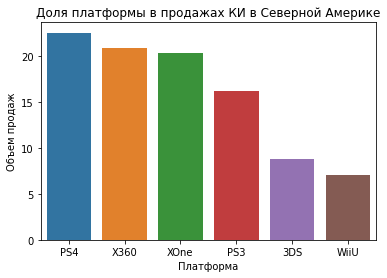

In [41]:
ax = sns.barplot(x='platform',
            y='part_of_region_sales_NA',
            data=data_NA.query('part_of_region_sales_NA > 5'),
            )

ax.set_title("Доля платформы в продажах КИ в Северной Америке")
ax.set(xlabel='Платформа', ylabel='Объем продаж')

Наиболее популярными играми в NA являются игры выпущенные для платформ: X360, PS4, XOne, X360, PS3, 3DS. Плаформы X360 и XOne с совокупной долей рынка в регионе 41.37% является продуктом компании Microsoft, аллоцированной в регионе. В силу чего КИ для этих платорм превалируют. Заметна сильная конкуренция со стороны PS4.

In [42]:
data_JP = data_reg.sort_values(by = 'part_of_region_sales_JP', ascending = False)
data_JP

,platform,eu_sales,jp_sales,na_sales,total_value,"share_of_region_sales_NA, %","share_of_region_sales_EU, %","share_of_region_sales_JP, %",part_of_region_sales_NA,part_of_region_sales_EU,part_of_region_sales_JP
0,3DS,28.63,59.78,34.06,122.47,27.81,23.38,48.81,8.82,8.55,50.61
3,PS3,66.55,22.05,62.83,151.43,41.49,43.95,14.56,16.27,19.86,18.67
5,PSV,5.71,15.03,4.89,25.63,19.08,22.28,58.64,1.27,1.70,12.72
4,PS4,109.31,10.22,87.25,206.78,42.19,52.86,4.94,22.59,32.63,8.65
6,WiiU,18.37,10.21,27.11,55.69,48.68,32.99,18.33,7.02,5.48,8.64
7,X360,41.81,0.51,80.97,123.29,65.67,33.91,0.41,20.96,12.48,0.43
8,XOne,41.96,0.33,78.85,121.14,65.09,34.64,0.27,20.41,12.52,0.28
1,DS,0.85,0.00,0.57,1.42,40.14,59.86,0.00,0.15,0.25,0.00
2,PC,21.83,0.00,9.75,31.58,30.87,69.13,0.00,2.52,6.52,0.00


[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Объем продаж')]

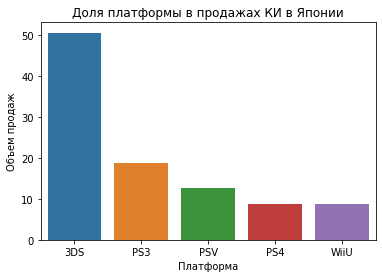

In [43]:
ax = sns.barplot(x='platform',
            y='part_of_region_sales_JP',
            data=data_JP.query('part_of_region_sales_JP > 5'),
            )

ax.set_title("Доля платформы в продажах КИ в Японии")
ax.set(xlabel='Платформа', ylabel='Объем продаж')

В Японии наибольшее распространение получили игры на платформах: 3DS (50.61%), PS3 (18.67%), PSV(12.72%), PS4 (8.65%), WiiU(8.64%). Производители этих платформ (Sony, Nintendo) расположены в Японии и выпускают игры с учетом специфики азиатской культуры. Особенностью продаж в этом регионе является то, что в топ-5 платформ нет американских конкурентов.

In [44]:
data_EU = data_reg.sort_values(by = 'part_of_region_sales_EU', ascending = False)
data_EU

,platform,eu_sales,jp_sales,na_sales,total_value,"share_of_region_sales_NA, %","share_of_region_sales_EU, %","share_of_region_sales_JP, %",part_of_region_sales_NA,part_of_region_sales_EU,part_of_region_sales_JP
4,PS4,109.31,10.22,87.25,206.78,42.19,52.86,4.94,22.59,32.63,8.65
3,PS3,66.55,22.05,62.83,151.43,41.49,43.95,14.56,16.27,19.86,18.67
8,XOne,41.96,0.33,78.85,121.14,65.09,34.64,0.27,20.41,12.52,0.28
7,X360,41.81,0.51,80.97,123.29,65.67,33.91,0.41,20.96,12.48,0.43
0,3DS,28.63,59.78,34.06,122.47,27.81,23.38,48.81,8.82,8.55,50.61
2,PC,21.83,0.00,9.75,31.58,30.87,69.13,0.00,2.52,6.52,0.00
6,WiiU,18.37,10.21,27.11,55.69,48.68,32.99,18.33,7.02,5.48,8.64
5,PSV,5.71,15.03,4.89,25.63,19.08,22.28,58.64,1.27,1.70,12.72
1,DS,0.85,0.00,0.57,1.42,40.14,59.86,0.00,0.15,0.25,0.00


[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Объем продаж')]

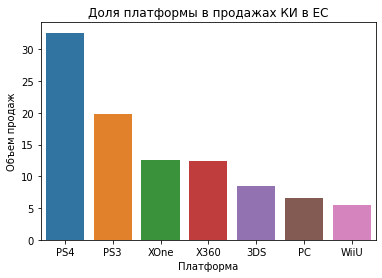

In [45]:
ax = sns.barplot(x='platform',
            y='part_of_region_sales_EU',
            data=data_EU.query('part_of_region_sales_EU > 5'),
            )

ax.set_title("Доля платформы в продажах КИ в ЕС")
ax.set(xlabel='Платформа', ylabel='Объем продаж')

На европейском рынке видна конкуренция американских и японских производителей. Наибольшую популярность получили такие платформы как: PS4 (32.63%), PS3 (19.86%), XOne (12.52%), X360(12.48%), 3DS (8.55%). Европейцы при выборе плафтормы выбирают количество эксклюзивов для конкретной платформы, а также наличие платных сервисов, которые она предоставляет.

In [46]:
#построим таблицу с наиболее популярными жанрами КИ в разрезе каждого региона:
data_part_of_regions = big_data_for_analyze.pivot_table(
           index='genre', \
           values=['na_sales', 'eu_sales', 'jp_sales'], \
          aggfunc='sum' \
).reset_index()

In [47]:
#посчитаем доли каждого жанра в общем объеме проданных игр по регионам:
data_part_of_regions['part_of_region_sales_NA'] = round(data_part_of_regions['na_sales']/data_part_of_regions['na_sales'].sum()*100,2)
data_part_of_regions['part_of_region_sales_EU'] = round(data_part_of_regions['eu_sales']/data_part_of_regions['eu_sales'].sum()*100,2)
data_part_of_regions['part_of_region_sales_JP'] = round(data_part_of_regions['jp_sales']/data_part_of_regions['jp_sales'].sum()*100,2)
data_part_of_regions

,genre,eu_sales,jp_sales,na_sales,part_of_region_sales_NA,part_of_region_sales_EU,part_of_region_sales_JP
0,Action,106.32,32.58,115.28,29.84,31.74,27.58
1,Adventure,6.80,3.93,6.15,1.59,2.03,3.33
2,Fighting,7.21,6.88,13.71,3.55,2.15,5.82
3,Misc,16.53,7.94,23.33,6.04,4.93,6.72
4,Platform,13.35,4.68,15.64,4.05,3.98,3.96
5,Puzzle,0.99,1.18,0.83,0.21,0.30,1.00
6,Racing,18.42,2.29,12.23,3.17,5.50,1.94
7,Role-Playing,32.69,43.40,40.51,10.49,9.76,36.74
8,Shooter,71.96,5.55,93.50,24.21,21.48,4.70
9,Simulation,9.59,4.19,4.63,1.20,2.86,3.55


In [48]:
data_genre_JP = data_part_of_regions.sort_values(by = 'part_of_region_sales_JP', ascending = False)
data_genre_JP

,genre,eu_sales,jp_sales,na_sales,part_of_region_sales_NA,part_of_region_sales_EU,part_of_region_sales_JP
7,Role-Playing,32.69,43.40,40.51,10.49,9.76,36.74
0,Action,106.32,32.58,115.28,29.84,31.74,27.58
3,Misc,16.53,7.94,23.33,6.04,4.93,6.72
2,Fighting,7.21,6.88,13.71,3.55,2.15,5.82
8,Shooter,71.96,5.55,93.50,24.21,21.48,4.70
4,Platform,13.35,4.68,15.64,4.05,3.98,3.96
9,Simulation,9.59,4.19,4.63,1.20,2.86,3.55
10,Sports,47.62,3.99,57.58,14.91,14.21,3.38
1,Adventure,6.80,3.93,6.15,1.59,2.03,3.33
6,Racing,18.42,2.29,12.23,3.17,5.50,1.94


[Text(0.5, 0, 'жанр'), Text(0, 0.5, 'Объем продаж')]

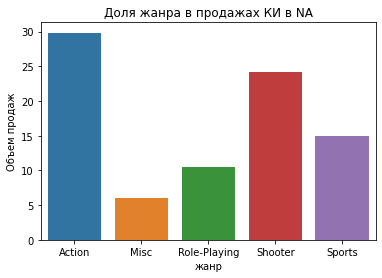

In [49]:
ax = sns.barplot(x='genre',
            y='part_of_region_sales_NA',
            data=data_part_of_regions.query('part_of_region_sales_NA > 6'),
            )

ax.set_title("Доля жанра в продажах КИ в NA")
ax.set(xlabel='жанр', ylabel='Объем продаж')

В Северной Америке наиболее популярные жанры: 
- Action (29.84%)
- Shooter (24.21%)
- Sports (14.91%)
- Role-Playing (10.49%)
- Misc (6.04%)


[Text(0.5, 0, 'жанр'), Text(0, 0.5, 'Объем продаж')]

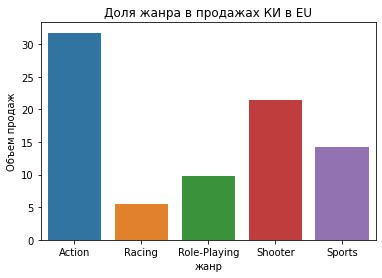

In [50]:
ax = sns.barplot(x='genre',
            y='part_of_region_sales_EU',
            data=data_part_of_regions.query('part_of_region_sales_EU > 5'),
            )

ax.set_title("Доля жанра в продажах КИ в EU")
ax.set(xlabel='жанр', ylabel='Объем продаж')

В ЕС наиболее популярные жанры: 
- Action (31.74%)
- Shooter (21.48%)
- Sports (14.21%)
- Role-Playing (9.76%)
- Racing (5.5%)

[Text(0.5, 0, 'жанр'), Text(0, 0.5, 'Объем продаж')]

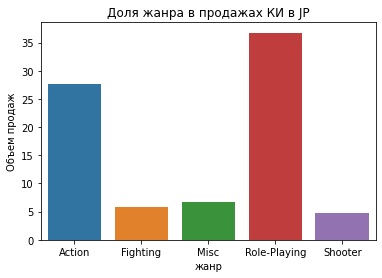

In [51]:
ax = sns.barplot(x='genre',
            y='part_of_region_sales_JP',
            data=data_part_of_regions.query('part_of_region_sales_JP > 4'),
            )

ax.set_title("Доля жанра в продажах КИ в JP")
ax.set(xlabel='жанр', ylabel='Объем продаж')

В Японии наиболее популярные жанры: 
- Role-Playing (36.74%)
- Action (27.58%)
- Misc (6.72%)
- Fighting (5.82%)
- Shooter (4.70%)

Игровые предпочтения американцев и европейцев практически схожи за исключением предпочтений в жанрах Misc (для NA) и гонок (для EU). В Японии особым уважением в геймсообществе пользуется игры жанра Role-Playing. Во всех регионах популярны спортивные игры.

In [52]:
#построим таблицу зависимости продаж игр от выставленного рейтинга:
data_ESRB = big_data_for_analyze.pivot_table(
           index='rating', \
           values=['na_sales', 'eu_sales', 'jp_sales'], \
           aggfunc='sum' \
           ).reset_index()
data_ESRB

,rating,eu_sales,jp_sales,na_sales
0,E,68.45,13.93,70.60
1,E10+,34.43,5.44,44.44
2,M,128.78,12.91,149.54
3,T,32.13,18.17,40.84
4,no rating,71.23,67.68,80.86


In [53]:
# определим доли продаж игр по регионам в зависимости от рейтинга:
data_ESRB['share_eu_sales (%)'] = round(data_ESRB['eu_sales']/data_ESRB['eu_sales'].sum()*100,2)
data_ESRB['share_na_sales (%)'] = round(data_ESRB['na_sales']/data_ESRB['na_sales'].sum()*100,2)
data_ESRB['share_jp_sales (%)'] = round(data_ESRB['jp_sales']/data_ESRB['jp_sales'].sum()*100,2)
data_ESRB

,rating,eu_sales,jp_sales,na_sales,share_eu_sales (%),share_na_sales (%),share_jp_sales (%)
0,E,68.45,13.93,70.60,20.43,18.28,11.79
1,E10+,34.43,5.44,44.44,10.28,11.50,4.61
2,M,128.78,12.91,149.54,38.44,38.71,10.93
3,T,32.13,18.17,40.84,9.59,10.57,15.38
4,no rating,71.23,67.68,80.86,21.26,20.93,57.29


In [54]:
# удалим изначальные данные и оставим только столбцы с относительными значениями:
data_ESRB1 = data_ESRB.drop(columns = ['eu_sales', 'jp_sales', 'na_sales'], axis = 1)
data_ESRB1

,rating,share_eu_sales (%),share_na_sales (%),share_jp_sales (%)
0,E,20.43,18.28,11.79
1,E10+,10.28,11.50,4.61
2,M,38.44,38.71,10.93
3,T,9.59,10.57,15.38
4,no rating,21.26,20.93,57.29


[Text(0.5, 0, 'рейтинг'), Text(0, 0.5, 'Объем продаж')]

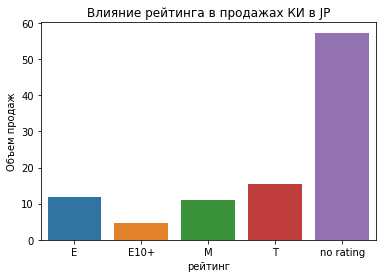

In [55]:
ax = sns.barplot(x='rating',
            y='share_jp_sales (%)',
            data=data_ESRB1,
            )

ax.set_title("Влияние рейтинга в продажах КИ в JP")
ax.set(xlabel='рейтинг', ylabel='Объем продаж')

Рейтинг ESRB на продажи в Японии оказывает существенное влияния. Продажи с рейтингом Т занимают 34.32% регионального рынка. Также в списке лидеров игры с рейтингом Е (27.96%) и М (26.14%). Доля игр, проданных без рейтинга, незначительна (менее 1%).

[Text(0.5, 0, 'рейтинг'), Text(0, 0.5, 'Объем продаж')]

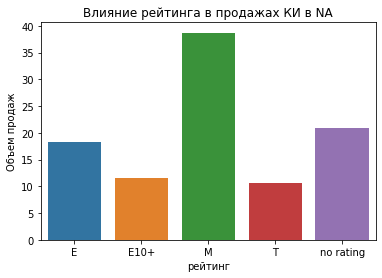

In [56]:
ax = sns.barplot(x='rating',
            y='share_na_sales (%)',
            data=data_ESRB1,
            )

ax.set_title("Влияние рейтинга в продажах КИ в NA")
ax.set(xlabel='рейтинг', ylabel='Объем продаж')

В NA большая часть игр продается с указанием рейтинга:
- на долю игр с рейтингом E приходится 23.01% всех продаж
- на долю игр с рейтингом М приходится 48.93% всех продаж
- на долю игр с рейтингом Т приходится 13.39% всех продаж
- на долю игр с рейтингом Е10+ приходится 14.25% всех продаж

Без рейтинга продано менее 1 % игр

[Text(0.5, 0, 'рейтинг'), Text(0, 0.5, 'Объем продаж')]

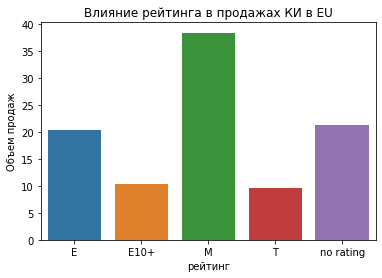

In [57]:
ax = sns.barplot(x='rating',
            y='share_eu_sales (%)',
            data=data_ESRB1,
            )

ax.set_title("Влияние рейтинга в продажах КИ в EU")
ax.set(xlabel='рейтинг', ylabel='Объем продаж')

В EU большая часть игр продается с указанием рейтинга:
- на долю игр с рейтингом E приходится 25.65% всех продаж
- на долю игр с рейтингом М приходится 48.58% всех продаж
- на долю игр с рейтингом Т приходится 12.21% всех продаж
- на долю игр с рейтингом Е10+ приходится 12.66% всех продаж

Без рейтинга продано 15.92% игр

## Проверка гипотез

**Проверка гипотезы**: Средние пользовательские рейтинги платформ XOne и PC одинаковые

```
H_0: Пользовательский рейтинг (user_score) платформы "XOne" = Пользовательский рейтинг (user_score) платформы "PC"
H_a: Пользовательский рейтинг (user_score) платформы "XOne" ≠  Пользовательский рейтинг (user_score) платформы "PC"
alpha = 0.05
```


In [58]:
big_data_for_analyze = big_data_for_analyze.dropna(subset =['user_score'])
value_XOne = big_data_for_analyze.loc[(big_data_for_analyze['platform'] == 'XOne'), 'user_score']
value_PC = big_data_for_analyze.loc[(big_data_for_analyze['platform'] == 'PC'), 'user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(value_XOne,value_PC, equal_var = False)
# alpha = задаем значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xone и PC не равны.

**Проверка гипотезы**: Средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Пользовательский рейтинг (user_score) жанра "Action" = Пользовательский рейтинг (user_score) жанра "Sports"
H_a: Пользовательский рейтинг (user_score) жанра "Action" ≠  Пользовательский рейтинг (user_score) жанра "Sports"
alpha = 0.05
```

In [59]:
value_Action = big_data_for_analyze.loc[(big_data_for_analyze['genre'] == 'Action'), 'user_score']
value_Sports = big_data_for_analyze.loc[(big_data_for_analyze['genre'] == 'Sports'), 'user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(value_Action,value_Sports, equal_var = False)
# alpha = задаем значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.496840916962323e-18
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанр Action и Sports равны.

## Выводы:

Для достижения целей проекта (поиск особенностей и зависимостей, которые существуют на рынке продаж компьютерных игр) была выполнена предобработка данных. 

На этапе предобработки данных было определено:

**1**. Наличие пустых значений в графах:
- name
- year_of_release

Пустые значения были удалены. Объем удаленных данных составил не более 1,61% от объема данных.

1.1. Проанализирован столбец 'user_score'. Найденные в нем значения TBD (To Be Determined) - не указанная на данный момент оценка пользователей, которая будет определена ими позже, были заменены на NaN.

**2**. По ряду столцов произведены замена данных:

2.1. Заменен тип данных у значений столбцов 'user_score'  на float. Столбец 'rating'  оставлен с типом object, т.к. встречаются
категориальные оценки игр (E,T и пр.);

2.2. Переведен тип данных в столбце 'year_of_release' в int.

**3**. В рамках проведенного анализа динамики продаваемых игр по годам было обнаружено, что с 1993 года начинается активный рост числа выпускаемых игр на различных платформах, и, как следствие, рост валового объема продаж. До этого периода динамика выпуска новых релизов в игровой индустрии была незначительной. Для целей дальнейшего анализа был применен метод query для фильтрации года выпуска игр. По результатам фильтрации, мы оставили для целей дальнейшего анализа 16 077 записей (исключили 367 значений (игр выпущенных до 1193 года и не принесших выручки от продаж), что составило порядка 2,2 % от общих данных).

**4**. Были выделены наиболее прибыльные платфомры, по параметру объема проданных игр (млн. копий): 
- PS2     1233.56
- X360     961.24
- PS3      931.34
- Wii      891.18
- DS       802.76
- PS       727.58

Для указанных выше топовых платформ: PS2, DS, PS3, Wii, X360, PS средний срок стабильных продаж и выхода новых игр - 10 лет. Это и есть период жизни платформы. Так, для:
- PS2: за период с момента выхода игр (2000 год) по 2004 год продажи выростали до 205 млн. прод. копий в год
- DS: за период с 1985 по 2007 год продажи вырастали до 150 млн. прод. копий в год
- PS3: за период с 2006 год по 2011 год продажи вырастали до 159 млн. копий в год
- WII: объем продаж выростал более чем за 200 млн. копий в 2009 году
- X360: в 2010 году объем продаж превысил 170 млн. копий
- PS: в 1998 году продажи превысили 170 млн. копий

Выше был определен перечень наиболее прибыльных плтаформ за весь анализируемый период. Однако в перечень таковых попали платформы, жизненный цикл которых закончен до окончания периода анализа (2016 года): PS2 (2011 год), DS (2013 год), PS (2003 год). 
Определим наиболее актуальные платформы, по которым можно построить прогноз на будущий год.

Наблюдается снижение продаж по таким платформам как 
(данные 2016 года неполные по условию задачи проекта, на этот год ориентируемся только для подтверждения динамики):
- PSV (в 2015 году снижение составило - 5,65 млн. проданных копий (-47%) по сравнении с аналогичным периодом прошлого года - АППГ)
- WiiU (в 2015 году снижение составило - 5,68 млн. проданных копий (-25,8%) по сравнению с АППГ)
- PC (в 2015 году снижение составило - 4,76 млн. проданных копий (-35,8%) по сравнению с АППГ)
- 3DS (в 2015 году снижение составило - 15,98 млн. проданных копий (-36,5%) по сравнению с АППГ)
- PSP (в 2015 году снижение составило - 0,12 млн. проданных копий (-59,0%) по сравнению с АППГ)
- Wii (в 2015 году снижение составило - 2,61 млн. проданных копий (-69,6%) по сравнению с АППГ)
- PS3 (в 2015 году снижение составило - 30,94 млн. проданных копий (-64,8%) по сравнению с АППГ)
- X360 (в 2015 году снижение составило - 22,78 млн. проданных копий (-65,6%) по сравнению с АППГ)

Наблюдается росто продаж на таких платформах как:
(данные 2016 года неполные по условию задачи проекта, на этот год ориентируемся только для подтверждения динамики):
- XOne (в 2015 году рост составил - 6,07 млн. проданных копий (+11,2%) по сравнению с АППГ)
- PS4 (в 2015 году рост составил - 18,9 млн. проданных копий (+18,9%) по сравнению с АППГ)


Таким образом заметен ярко выраженный тренд "угасания продаж" на платформах предыдущего поколения и рост продаж на PS4, Xone - на 2016 год выступающих платформами нового поколения.

**5**. Проведена интерпретация графика "ящика с усами". По межквартильному размаху видно, что самые большие продажи игр за аназизируемый период наблюдались на платформах PS4,  XOne, PS3, X360, WiiU. Большая часть проданных игр на платформах PS3 и Х360 была реализована в пределах 750 тыс.копий, общий объем продаж у этих платформ в целом одинаков, как и медиана, но у Х360 были экземпляры, проданные большим тиражом (что показывают нам выбросы). Выявленные выбросы удалять из анализа не вижу целесообразным в силу особенности этих игровых платформ и эксклюзивных игр, выпущенных для них же. Этим и объясняется ниличие отдельных выбросов для каждой из платформ. Наличие выбросов, само по себе, дает представление о популряности определенной платформы в целом для геймсообщества.

**6**. Была проанализирована роль отзывов критиков и пользователей на продажи на наиболее популярных платформах.Влияние оценок пользователей (за исключением WiiU) нельзя назвать определяющим фактором в объемах продаж на наиболее популярных платформах. Однако на конкретных платформах определенная положительная связь между оценками критиков и валовым объемом продаж прослеживается. Так, например, Оценки критиков на игровой платформе Х360, при прочих равных условиях, могут практически на 35% обуславливать высокие продажи КИ при высоких оценках критиков. Такая же связь наблюдается и на платфорах PS4(43%), PS3 (33%), 3DS (38%), XOne (45,9%). Для платформы WiiU выявлена положительная зависимость оценок пользователей и продаж на платформе (r - 0.43)

Подобный анализ для других платформ позволил сделать следущий вывод:
По полученным данным зависимости объема продаж от оценок игрового сообщества, можно сделать вывод о наличии достаточно слабой положительной зависимости продаж от оценок критиков (r-коэффициент 0.19). Оценки игроков на продажи на исследуемых на данном этапе платформах практически влияния не оказывают.

**7**. Из полученных данно хорошо заметны лидеры в продажа - КИ жанров Action и Sports. C 2014 года заметно преобладание в объемах продаж жанра Sport. В 2013 году незначительно преобладали в продажах КИ жанра Action.

**8**. По анализу пользователей в конкретном регионе можно сделать вывод: 

Мы видим, что КИ для отдельных платформ продаются исключительно в конкретном регионе, например игры для DS продаются только в ЕС и в Северной Америке, вероятно в силу специфики гейминга на рассматриваемой платформе и особенностей самих игр, не нашедших популярность у азиатских игроков. Практически подобное объяснение можно увидеть и для платфом Xone (65.09% NA), X360 (65.67% NA), большая часть продаж игр на которых зафиксирована в Северной Америке. В Японии такая тенденция прослеживается на платформах PSV (58.64%), 3DS (48.81%)

Наиболее популярными играми в NA являются игры выпущенные для платформ: X360, PS4, XOne, X360, PS3, 3DS. Плаформы X360 и XOne с совокупной долей рынка в регионе 41.37% является продуктом компании Microsoft, аллоцированной в регионе. В силу чего КИ для этих платорм превалируют. Заметна сильная конкуренция со стороны PS4.

В Японии наибольшее распространение получили игры на платформах: 3DS (50.61%), PS3 (18.67%), PSV(12.72%), PS4 (8.65%), WiiU(8.64%). Производители этих платформ (Sony, Nintendo) расположены в Японии и выпускают игры с учетом специфики азиатской культуры. Особенностью продаж в этом регионе является то, что в топ-5 платформ нет американских конкурентов.

На европейском рынке видна конкуренция американских и японских производителей. Наибольшую популярность получили такие платформы как: PS4 (32.63%), PS3 (19.86%), XOne (12.52%), X360(12.48%), 3DS (8.55%). Европейцы при выборе плафтормы выбирают количество эксклюзивов для конкретной платформы, а также наличие платных сервисов, которые она предоставляет.

В Северной Америке наиболее популярные жанры: 
- Action (29.84%)
- Shooter (24.21%)
- Sports (14.91%)
- Role-Playing (10.49%)
- Misc (6.04%)

В ЕС наиболее популярные жанры: 
- Action (31.74%)
- Shooter (21.48%)
- Sports (14.21%)
- Role-Playing (9.76%)
- Racing (5.5%)

В Японии наиболее популярные жанры: 
- Role-Playing (36.74%)
- Action (27.58%)
- Misc (6.72%)
- Fighting (5.82%)
- Shooter (4.70%)

Игровые предпочтения американцев и европейцев практически схожи за исключением предпочтений в жанрах Misc (для NA) и гонок (для EU). В Японии особым уважением в геймсообществе пользуется игры жанра Role-Playing. Во всех регионах популярны спортивные игры.


Рейтинг ESRB на продажи в Японии оказывает существенное влияния. Продажи с рейтингом Т занимают 34.32% регионального рынка. Также в списке лидеров игры с рейтингом Е (27.96%) и М (26.14%). Доля игр, проданных без рейтинга, незначительна (менее 1%).

В NA большая часть игр продается с указанием рейтинга:
- на долю игр с рейтингом E приходится 23.01% всех продаж
- на долю игр с рейтингом М приходится 48.93% всех продаж
- на долю игр с рейтингом Т приходится 13.39% всех продаж
- на долю игр с рейтингом Е10+ приходится 14.25% всех продаж

Без рейтинга продано менее 1 % игр


В EU большая часть игр продается с указанием рейтинга:
- на долю игр с рейтингом E приходится 25.65% всех продаж
- на долю игр с рейтингом М приходится 48.58% всех продаж
- на долю игр с рейтингом Т приходится 12.21% всех продаж
- на долю игр с рейтингом Е10+ приходится 12.66% всех продаж

Без рейтинга продано 15.92% игр

**9***. Были проведены проверки гипотез:

**Проверка гипотезы**: Средние пользовательские рейтинги платформ XOne и PC одинаковые

```
H_0: Пользовательский рейтинг (user_score) платформы "XOne" = Пользовательский рейтинг (user_score) платформы "PC"
H_a: Пользовательский рейтинг (user_score) платформы "XOne" ≠  Пользовательский рейтинг (user_score) платформы "PC"
alpha = 0.05
```
Средние пользовательские рейтинги платформ Xone и PC не равны.

**Проверка гипотезы**: Средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Пользовательский рейтинг (user_score) жанра "Action" = Пользовательский рейтинг (user_score) жанра "Sports"
H_a: Пользовательский рейтинг (user_score) жанра "Action" ≠  Пользовательский рейтинг (user_score) жанра "Sports"
alpha = 0.05
```
Средние пользовательские рейтинги жанр Action и Sports равны.

**ОБЩИЙ ВЫВОД**
Исходя из ярко выявленного признака аллокационного распределения продаваемых компьютерных игр, можно сделать вывод, что в следующем году нужно придерживаться структуры продаж по регионам (для NA - большая часть игр должна быть для XOne, для JP - игры должны быть 3DS, PSP, WiiU, PS4). Европейский рынок более лояльный - на нем можно экспериментировать с различными игровыми платформами. Во всех регионах успехом пользуются жанры Action и Sports, в Японии нужно уделить внимание продажам играм в жанре Role-Playing. Обязательно нужно учесть спад продаж в популярных платформах, в всязи с окончанием "жизненного цикла" платформы. В период появления новых платформ и отсутствием большого числа эксклюзивов для них можно ориентироваться на действующие платформы и популярные жанры для них.